<a href="https://colab.research.google.com/github/Jo-Minseok/DataProgramming/blob/main/Global_Warming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 단계 1 : 폰트 설치
import matplotlib.font_manager as fm # 맷 플롯립 폰트 관련 모듈 임포트

!apt-get -qq -y install fonts-nanum > /dev/null
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname = font_path, size = 9)
fm._rebuild() # 폰트 매니저 재갱신, 새로고침을 하는 것, 런타임 새로고침이랑 비슷함

In [ ]:
# 단계 2 : 런타임 재시작
import os # os 모듈 임포트
os.kill(os.getpid(), 9) # os.getpid()함수로 pid값 = Process Identification Number(현재의 프로세스 ID) 라고 하는 값을 얻은 후, os.kill(pid,signal.sigstop) 형식으로, 프로세스 pid에 시그널 sig를 보냅니다. 호스트 플랫폼에서 사용할 수 있는 구체적인 시그널에 대한 상수는 signal 모듈에 정의되어 있습니다.

In [ ]:
# 단계 3 : 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제 해결
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname = font_path, size = 18).get_name()
plt.rc('font', family = font_name)
fm._rebuild()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

path = './drive/MyDrive/Global Warming/'

csv_file = path + 'BusanTemperature.csv'
tp = pd.read_csv(csv_file, encoding = 'CP949')
tp

,지점,지점명,일시,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
0,159,부산,1905,13.9,11.0,17.9
1,159,부산,1906,13.0,9.5,16.8
2,159,부산,1907,13.5,9.8,17.6
3,159,부산,1908,13.3,9.7,17.2
4,159,부산,1909,13.4,9.7,17.8
...,...,...,...,...,...,...
112,159,부산,2017,15.2,11.7,19.6
113,159,부산,2018,15.1,11.8,19.2
114,159,부산,2019,15.7,12.5,19.8
115,159,부산,2020,15.2,11.9,19.4


In [ ]:
tp.drop(columns = ['지점', '지점명'], axis = 1, inplace = True)
tp.set_index('일시', inplace = True)
tp

,평균기온(°C),평균최저기온(°C),평균최고기온(°C)
일시,,,
1905,13.9,11.0,17.9
1906,13.0,9.5,16.8
1907,13.5,9.8,17.6
1908,13.3,9.7,17.2
1909,13.4,9.7,17.8
...,...,...,...
2017,15.2,11.7,19.6
2018,15.1,11.8,19.2
2019,15.7,12.5,19.8


In [ ]:
x = np.array(tp.index)
y1 = tp['평균기온(°C)']
y2 = tp['평균최저기온(°C)']
y3 = tp['평균최고기온(°C)']

Text(0, 0.5, '기온(°C)')

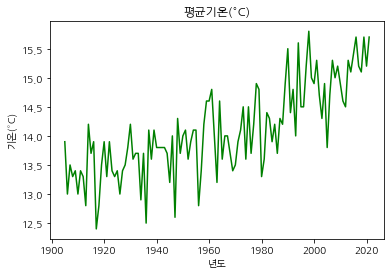

In [ ]:
plt.plot(x, y1, 'g')
plt.title('평균기온(°C)')
plt.xlabel('년도')
plt.ylabel('기온(°C)')

Text(0, 0.5, '기온(°C)')

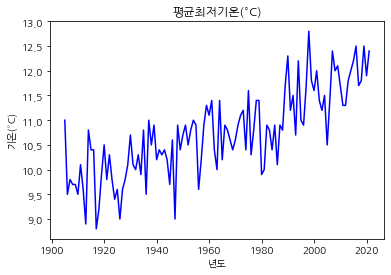

In [ ]:
plt.plot(x, y2, 'b')
plt.title('평균최저기온(°C)')
plt.xlabel('년도')
plt.ylabel('기온(°C)')

Text(0, 0.5, '기온(°C)')

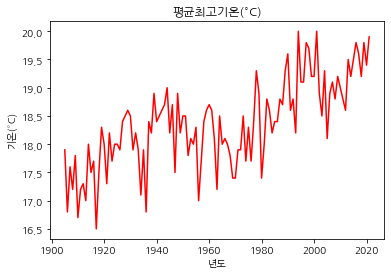

In [ ]:
plt.plot(x, y3, 'r')
plt.title('평균최고기온(°C)')
plt.xlabel('년도')
plt.ylabel('기온(°C)')

Text(0, 0.5, '기온(°C)')

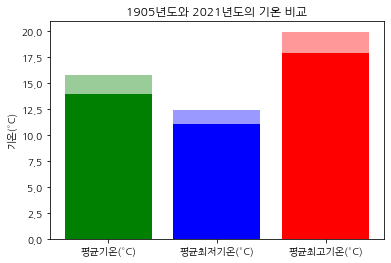

In [ ]:
x = np.arange(3)
xt = ['평균기온(°C)', '평균최저기온(°C)', '평균최고기온(°C)']
tp_1905 = [tp['평균기온(°C)'].iloc[0], tp['평균최저기온(°C)'].iloc[0], tp['평균최고기온(°C)'].iloc[0]]
tp_2021 = [tp['평균기온(°C)'].iloc[-1], tp['평균최저기온(°C)'].iloc[-1], tp['평균최고기온(°C)'].iloc[-1]]

plt.bar(x, tp_1905, color = ['green', 'blue', 'red'])
plt.bar(x, tp_2021, color = ['green', 'blue', 'red'], alpha = 0.4)
plt.xticks(x, xt)

plt.title('1905년도와 2021년도의 기온 비교')
plt.ylabel('기온(°C)')

### 다항회귀 예측을 얻는 방식

In [ ]:
#다항회귀 예측을 얻는 방식
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

def Poly(x):
  poly_features = PolynomialFeatures(degree = 2, include_bias = False)
  return poly_features.fit_transform(x)

def Predict_Temperature(data, year = 2100):
  x = np.asarray(data.index).reshape(-1, 1)
  poly_x = Poly(x)
  x_pred = np.arange(data.index[0], year + 1).reshape(-1, 1)
  poly_x_pred = Poly(x_pred)
  y = np.asarray(data)
  mode = 'Linear'
  
  lr = LinearRegression()
  lr.fit(x, y)
  y_predict = lr.predict(x)
  rmse = np.sqrt(mean_squared_error(y, y_predict))

  poly_lr = LinearRegression()
  poly_lr.fit(poly_x, y)
  poly_y_predict = poly_lr.predict(poly_x)
  poly_rmse = np.sqrt(mean_squared_error(y, poly_y_predict))

  if rmse > poly_rmse:
    lr = poly_lr
    x_pred = poly_x_pred
    y_predict = poly_y_predict
    rmse = poly_rmse
    mode = 'Poly'

  y_pred = lr.predict(x_pred)

  diff = (y - y_predict).max()

  plt.figure(figsize = (20, 12))
  plt.scatter(data.index, y, c = 'r', label = data.name)
  plt.plot(x_pred[:, 0], y_pred, c = 'y', label = 'Regression Line')
  plt.plot(x_pred[:, 0], y_pred + diff, c = 'k', label = 'Regression Line(Maximum)')
  plt.xlabel('년도', fontsize = 14)
  plt.ylabel('기온(°C)', fontsize = 14)
  plt.title(data.name + ' 회귀 분석(' + mode + ')' , fontsize = 18)
  plt.legend(fontsize = 22)

  return (y_pred, y_pred + diff)

2100년의 평균기온(°C) 평균값 : 18.843
2100년의 평균기온(°C) 최대값 : 19.93
2021년 대비 평균기온(°C) 상승량(평균값 기준) : 3.143
2021년 대비 평균기온(°C) 상승량(최대값 기준) : 4.23


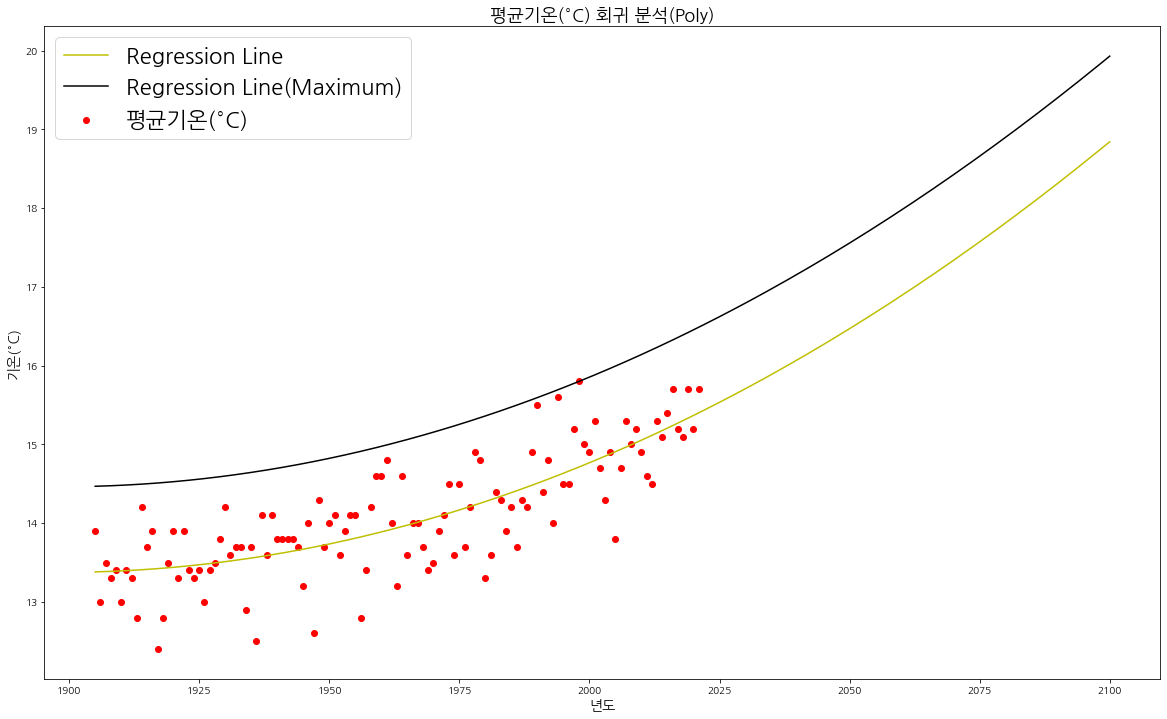

In [ ]:
### 다항회귀 분석으로 했을때, 나오는 값들을 그래프로 그렸을 때,
data = tp['평균기온(°C)'] #평균기온, 평균최저기온, 평균최대기온 설정에 따라 함수 실행 결과가 달라짐
year = 2100

pred, pred_max = Predict_Temperature(data, year)

print(str(year) + '년의 ' + data.name + ' 평균값 :', round(pred[-1], 3))
print(str(year) + '년의 ' + data.name + ' 최대값 :', round(pred_max[-1], 3))
print('2021년 대비 ' + data.name + ' 상승량(평균값 기준) :', round(pred[-1] - data.iloc[-1], 3))
print('2021년 대비 ' + data.name + ' 상승량(최대값 기준) :', round(pred_max[-1] - data.iloc[-1], 3))

### 다중회귀 예측을 얻는 방식

In [ ]:
from sklearn.model_selection import train_test_split

x = tp[['평균최저기온(°C)', '평균최고기온(°C)']]
y = tp['평균기온(°C)']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, shuffle = False)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

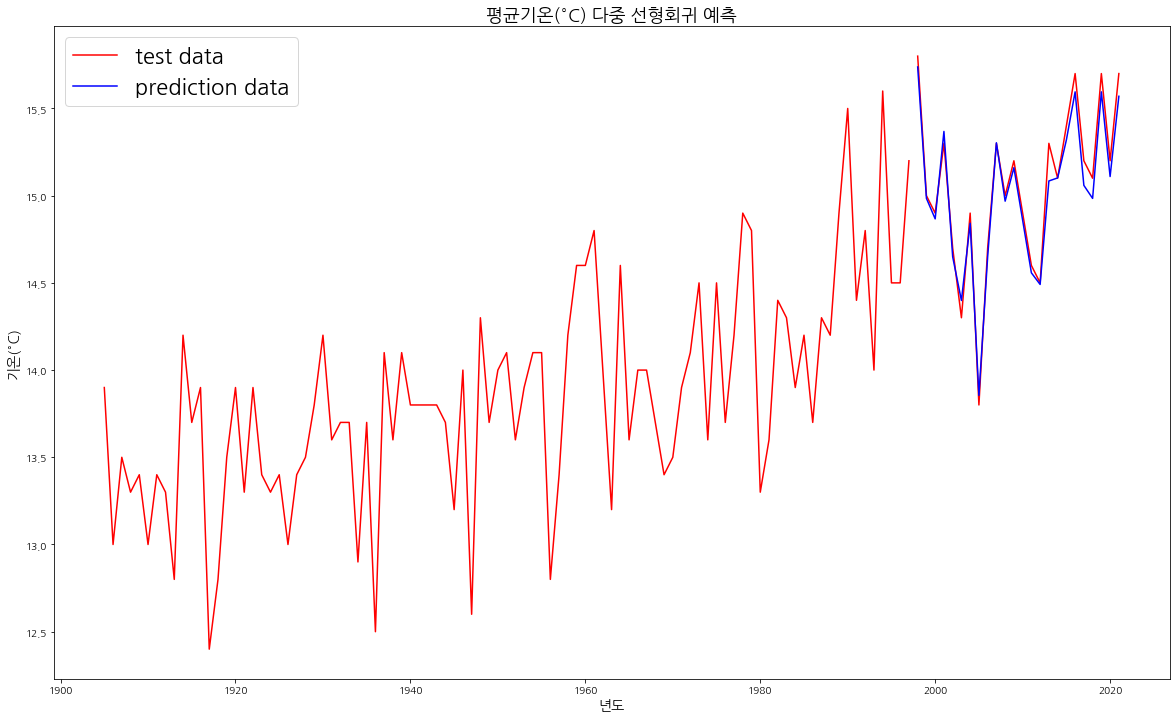

In [ ]:
# 다중 선형회귀 방식으로 예측했을때, 훈련 셋(트레인 셋)을 80% 검증 데이터를 20%(테스트)로 한 후, 셔플 안하는 이유는 꾸준히 증가하는 년도를 그에 따른 기온도 꾸준하게 증가하기 때문에, 추세를 얻을 수 없음.

y_predict = mlr.predict(x_test)

plt.figure(figsize = (20, 12))
plt.plot(y_train, 'r')
plt.plot(y_test, 'r', label = 'test data')
plt.plot(y_test.index, y_predict, 'b', label = 'prediction data')
plt.xlabel('년도', fontsize = 14)
plt.ylabel('기온(°C)', fontsize = 14)
plt.title('평균기온(°C) 다중 선형회귀 예측', fontsize = 18)
plt.legend(fontsize = 22)

### 다중회귀를 사용하지 않는 이유

In [ ]:
### rmse_lr 에서 sqrt로 제곱근을 얻을 수 있다.
### rmse: 평균제곱오차의 제곱근이 낮은 것이 더 예측력이 좋기 때문에, 다항회귀를 사용하였다.

from sklearn.metrics import mean_squared_error # mse: 평균 제곱 오차

pred_low, pred_low_max = Predict_Temperature(tp['평균최저기온(°C)'], tp['평균최저기온(°C)'].index[-1])
plt.close()
pred_high, pred_high_max = Predict_Temperature(tp['평균최고기온(°C)'], tp['평균최고기온(°C)'].index[-1])
plt.close()
pred_lr, pred_max_lr = Predict_Temperature(tp['평균기온(°C)'], tp['평균기온(°C)'].index[-1])
plt.close()

df = pd.DataFrame({'pred_low' : pred_low, 
                   'pred_high' : pred_high, 
                   'pred_low_max' : pred_low_max, 
                   'pred_high_max' : pred_high_max})

pred_mlr = mlr.predict(df[['pred_low', 'pred_high']])

rmse_lr = np.sqrt(mean_squared_error(tp['평균기온(°C)'], pred_lr)) # rmse: 평균 제곱근 오차
rmse_mlr = np.sqrt(mean_squared_error(tp['평균기온(°C)'], pred_mlr)) # rmse를 쓴 이유는 오차가 0 이하가 나올 경우, 제곱을 하면, 제대로 된 오차를 구할 수 없기 떄문에, 제곱을 한 거에 다시 루트를 원래 오차 값이 나옴.

print('선형(다항)회귀 예측 값 RMSE:', round(rmse_lr, 3))
print('다중회귀 예측 값 RMSE(최저, 최고 평균값 사용) :', round(rmse_mlr, 3))

선형(다항)회귀 예측 값 RMSE: 0.467
다중회귀 예측 값 RMSE(최저, 최고 평균값 사용) : 0.471
      pred_low  pred_high  pred_low_max  pred_high_max
0     9.777458  17.578736     11.127451      18.727044
1     9.786950  17.586892     11.136943      18.735200
2     9.796627  17.595189     11.146620      18.743497
3     9.806488  17.603625     11.156482      18.751933
4     9.816534  17.612201     11.166528      18.760509
..         ...        ...           ...            ...
112  11.988139  19.360571     13.338132      20.508879
113  12.018308  19.384372     13.368301      20.532681
114  12.048661  19.408314     13.398655      20.556622
115  12.079200  19.432394     13.429193      20.580702
116  12.109922  19.456615     13.459915      20.604923

[117 rows x 4 columns]


### 다항회귀 분석을 통해 예측했을 때, 나오는 그래프

예측할 년도 입력 : 2010
----------------------------------------
실제 값 : 14.9
선형(다항)회귀 예측 값(평균) : 15.054
선형(다항)회귀 예측 값(최대) : 16.141
----------------------------------------


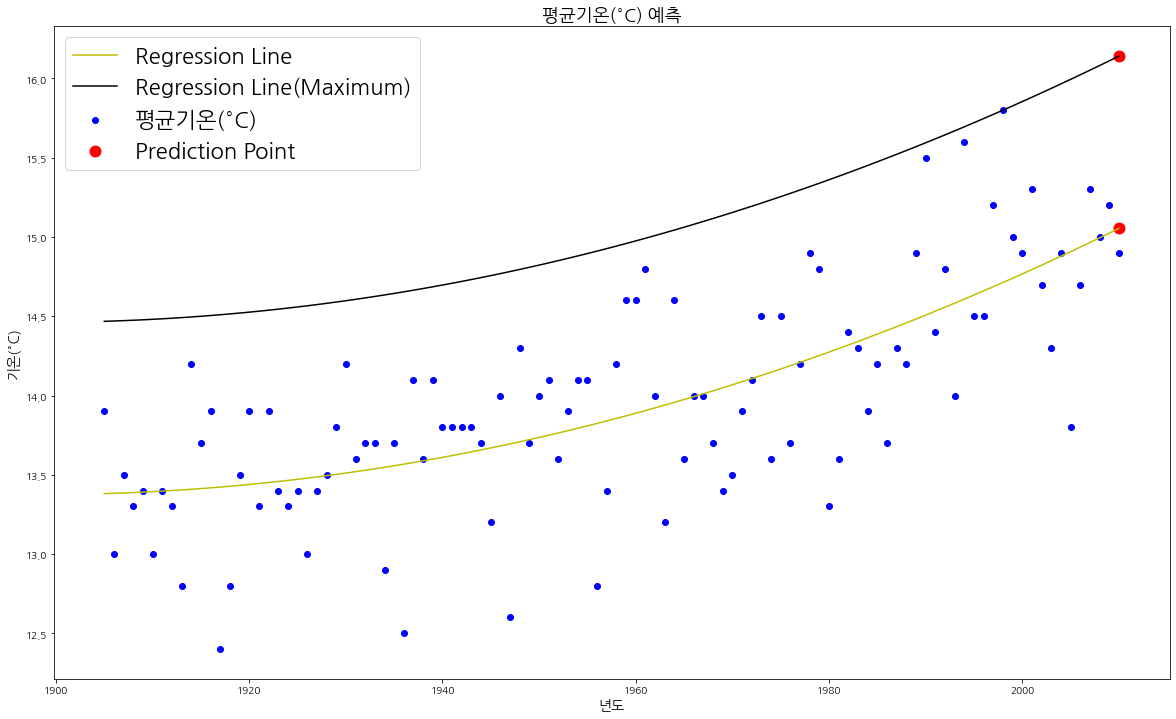

In [ ]:
import warnings

warnings.filterwarnings(action = 'ignore')

year = int(input('예측할 년도 입력 : '))

pred_lr, pred_max_lr = Predict_Temperature(tp['평균기온(°C)'], year)
plt.close()

print('-' * 40)

plt.figure(figsize = (20, 12))

x = np.arange(tp['평균기온(°C)'].index[0], year + 1)

if year > tp['평균기온(°C)'].index[-1]:
  plt.scatter(tp['평균기온(°C)'].index, tp['평균기온(°C)'], c = 'b', label = '평균기온(°C)')
  print('실제 값 : 알 수 없음')
else:
  plt.scatter(x, tp['평균기온(°C)'].loc[:year], c = 'b', label = '평균기온(°C)')
  print('실제 값 :', tp['평균기온(°C)'].loc[year])

plt.plot(x, pred_lr, c = 'y', label = 'Regression Line')
plt.plot(x, pred_max_lr, c = 'k', label = 'Regression Line(Maximum)')
plt.scatter(x[-1], pred_lr[-1], c = 'r', s = 120, label = 'Prediction Point')
plt.scatter(x[-1], pred_max_lr[-1], c = 'r', s = 120)
plt.xlabel('년도', fontsize = 14)
plt.ylabel('기온(°C)', fontsize = 14)
plt.title('평균기온(°C) 예측' , fontsize = 18)
plt.legend(fontsize = 22)

print('선형(다항)회귀 예측 값(평균) :', round(pred_lr[-1], 3))
print('선형(다항)회귀 예측 값(최대) :', round(pred_max_lr[-1], 3))
print('-' * 40)